# FIFA 19 - Analysis
## In this Notebook I'll do an analysis on fifa 19 players and also I'll focus on Egyptian and some Arab countries players.
### The data is from Kaggle FIFA 19 complete player dataset : https://www.kaggle.com/karangadiya/fifa19

In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('Fifa19-Data.csv')

# check first 5 rows and shape
print(data.shape)
data.head()

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# drop unnamed 0 col
data.drop("Unnamed: 0", axis=1, inplace = True)

In [4]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [5]:
# describing the data
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Cleaning the Data

In [6]:
# checking missing values
data.isna().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [7]:
# filling missing values
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0, inplace = True)

In [8]:
# functions to apply on some columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [9]:
# Renaming column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

In [10]:
# adding some useful attributes
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [11]:
# function for cleaning the Weight column

def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

# applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [12]:
# function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [13]:
# creating player dataframe

players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club', 'Position']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club,Position
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona,RF
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,ST
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain,LW
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United,GK
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,RCM


In [14]:
# function to return players of specified country
def country(x):
    return players[players['Nationality'] == x][['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Position', 'Club', 'Age']]


### Egyptian players

In [15]:
country("Egypt")

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
26,M. Salah,41,80,76,77,92,78,88,74,RM,Liverpool,26
752,Trezeguet,35,66,56,75,78,70,79,70,LM,Kasimpaşa SK,23
959,M. Elneny,74,68,72,74,64,73,78,60,RDM,Arsenal,25
1517,A. Hegazi,77,53,55,44,54,71,77,24,LCB,West Bromwich Albion,27
2241,A. Hassan,23,72,64,46,60,58,76,70,ST,Olympiacos CFP,25
2259,Kahraba,40,72,57,65,77,70,76,64,LM,No Club,24
2334,R. Sobhi,45,74,63,71,71,65,76,63,LM,Huddersfield Town,21
3310,A. Elmohamady,63,72,67,71,74,76,72,64,RB,Aston Villa,30
3616,A. Warda,32,62,50,73,72,55,74,64,RM,PAOK,24
3929,A. Ghazal,70,63,66,59,61,66,74,36,CDM,Vancouver Whitecaps FC,26


### Saudi Arabia players

In [16]:
# there is more than 300 players, check first 30
country('Saudi Arabia')[:30]

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
2145,S. Al Faraj,69,69,70,75,74,71,74,67,CM,Al Hilal,28
2683,M. Hawsawi,72,56,55,45,67,73,74,43,CB,Al Ahli,26
2723,N. Al Abed,46,64,63,71,76,70,73,70,LM,Al Hilal,28
3014,S. Al Dawsari,46,69,62,64,79,68,73,67,LM,Al Hilal,26
3033,T. Al Jassam,71,71,70,69,72,70,73,68,CAM,Al Wehda,33
3285,O. Hawsawi,72,57,60,55,64,75,72,54,RCB,Al Wehda,34
3461,F. Al Muwallad,39,63,63,63,83,74,74,65,LM,Al Ittihad,23
3738,Y. Al Shahrani,68,64,65,69,80,65,73,61,LB,Al Hilal,26
4021,O. Hawsawi,67,47,58,47,70,72,71,29,CB,Al Nassr,32
4679,M. Al Owais,15,17,35,21,49,58,72,16,GK,Al Ahli,26


### Algeria Players

In [17]:
country('Algeria')[:30]

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
84,R. Mahrez,31,78,67,80,85,70,85,77,RW,Manchester City,27
94,Y. Brahimi,37,77,67,77,84,73,85,74,LM,FC Porto,28
358,F. Ghoulam,80,76,73,79,76,73,82,66,LB,Napoli,27
507,R. Boudebouz,40,72,66,80,75,67,80,79,CAM,Real Betis,28
635,A. Mandi,80,72,72,76,71,72,80,44,RCB,Real Betis,26
684,S. Feghouli,31,72,62,73,84,70,79,70,RM,Galatasaray SK,28
791,N. Bentaleb,65,71,76,74,70,68,80,72,CM,FC Schalke 04,23
1357,I. Slimani,36,74,73,64,61,73,76,70,ST,Fenerbahçe SK,30
1365,S. Taïder,69,72,73,74,74,75,76,70,LCM,Montreal Impact,26
1385,S. Hanni,53,70,66,72,75,63,76,72,LW,Spartak Moscow,27


### Morocco players

In [18]:
country('Morocco')[:30]

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
73,M. Benatia,87,61,68,58,70,74,86,42,CB,Juventus,31
171,H. Ziyech,51,77,76,86,79,65,84,75,RAM,Ajax,25
455,Z. Feddal,80,60,65,67,58,63,80,48,CB,Real Betis,28
559,A. Harit,42,72,61,74,82,61,82,62,LCM,FC Schalke 04,21
656,Y. Belhanda,53,78,72,78,78,76,79,76,CAM,Galatasaray SK,28
730,A. Hakimi,74,71,69,74,83,75,82,58,LB,Borussia Dortmund,19
822,F. Fajr,75,71,71,79,69,60,78,72,RCM,Stade Malherbe Caen,29
923,K. El Ahmadi,73,69,76,73,70,73,77,62,RDM,Al Ittihad,33
924,M. Carcela-González,31,70,63,70,84,72,77,72,RM,Standard de Liège,29
961,Y. Bounou,18,14,29,33,46,47,78,19,GK,Girona FC,27


### Tunisia players

In [19]:
country('Tunisia')

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
1017,E. Skhiri,77,72,70,73,68,71,79,64,RCM,Montpellier HSC,23
1497,N. Sliti,31,70,63,71,75,75,76,70,RM,Dijon FCO,25
2701,D. Bronn,73,67,62,69,66,71,76,52,LCB,KAA Gent,23
2775,H. Harbaoui,22,66,63,58,62,64,73,66,ST,SV Zulte-Waregem,33
3055,A. Abdennour,72,55,65,59,58,70,73,51,CB,Olympique de Marseille,28
3197,Y. Benalouane,71,56,62,62,56,66,73,45,CB,Leicester City,31
3320,B. Srarfi,30,69,53,69,74,59,76,66,RW,OGC Nice,21
3601,S. Khaoui,40,65,54,72,70,61,74,64,CAM,Stade Malherbe Caen,23
3740,S. Ben Youssef,72,51,60,50,55,72,72,40,LCB,Kasimpaşa SK,29
4213,M. Hassen,13,16,28,22,55,52,74,16,GK,OGC Nice,23


### Iraq players

In [20]:
country("Iraq")

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Position,Club,Age
3868,A. Adnan,69,70,68,71,74,71,74,69,LM,Atalanta,24
3907,J. Meram,62,71,68,64,76,66,72,68,LM,Columbus Crew SC,29
4678,O. Rashid,54,68,65,71,69,64,72,67,LCM,Santa Clara,26
6259,D. Ismail,68,64,62,68,74,63,72,66,LB,Çaykur Rizespor,24
11900,Y. Kasim,56,61,64,63,63,70,64,52,CM,Northampton Town,27
12351,F. Dhia Putros,62,57,59,55,70,69,66,52,CB,Hobro IK,24
15907,S. Gubari,18,55,42,41,75,62,64,52,LM,SCR Altach,22


## Data Visualization

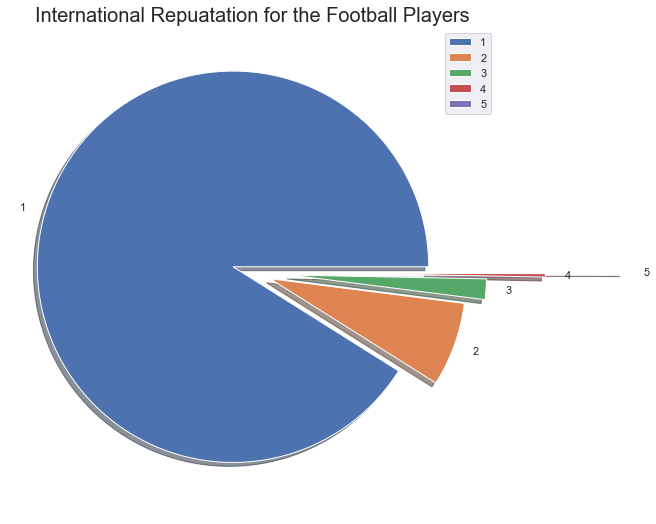

In [21]:
# plotting International reputation pie chart
labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels,explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()


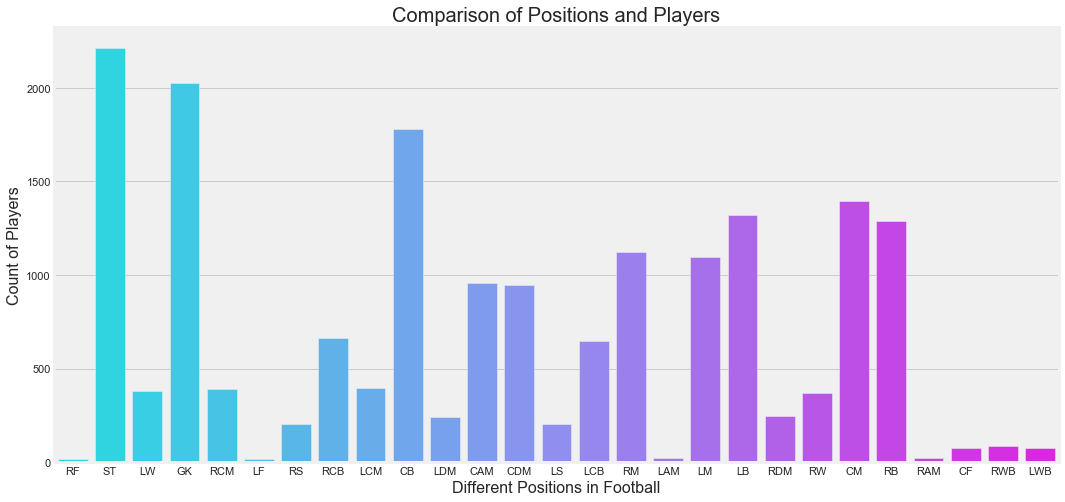

In [22]:
# Different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'cool')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

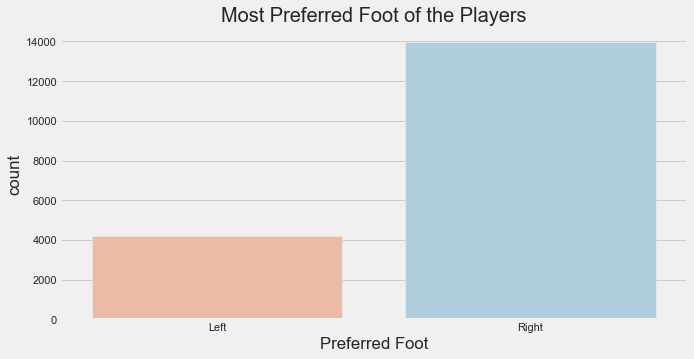

In [23]:
# Comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'RdBu')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

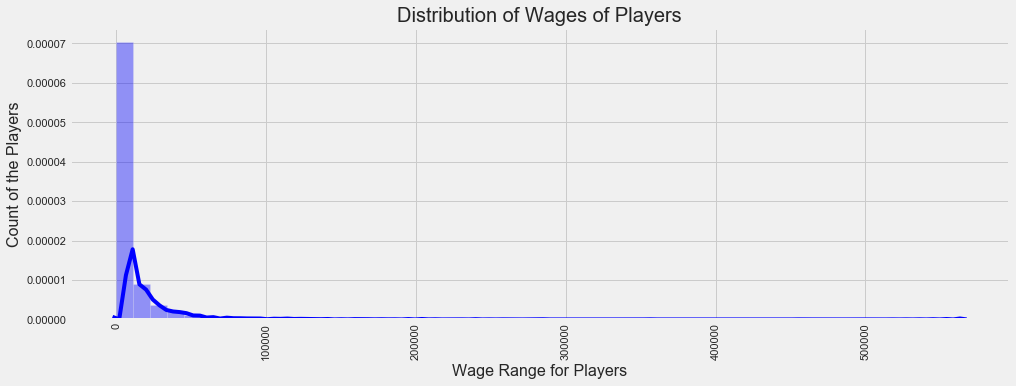

In [24]:
# Comparing the players’ Wages

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

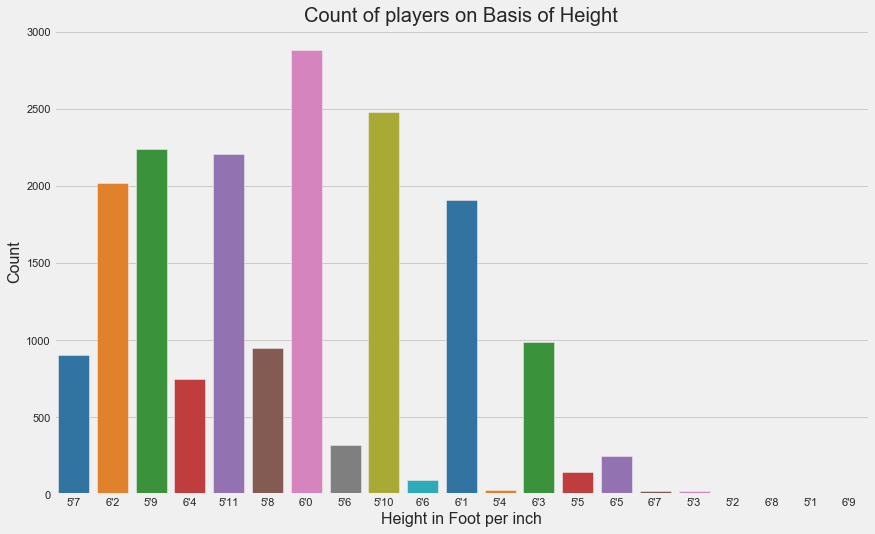

In [25]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'tab10')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

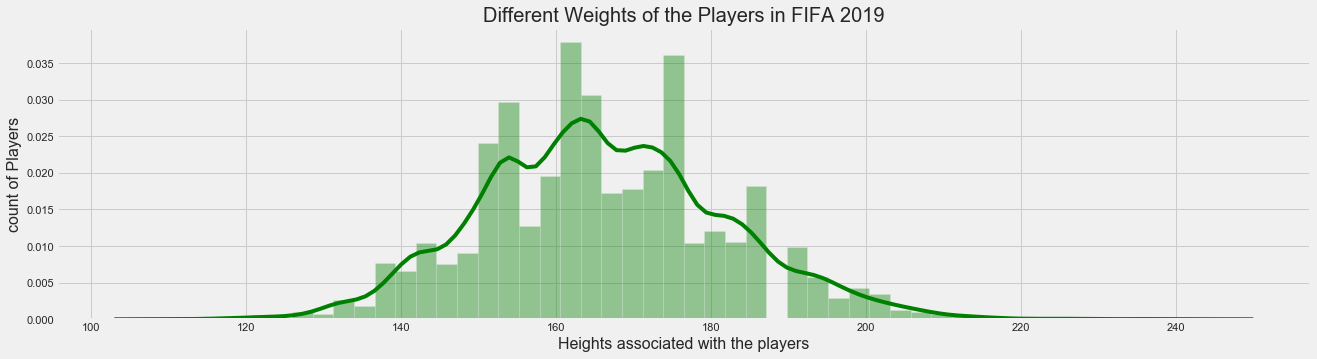

In [26]:
# Weight of players

plt.figure(figsize = (20, 5))
sns.distplot(data['Weight'], color = 'green')
plt.title('Different Weights of the Players in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

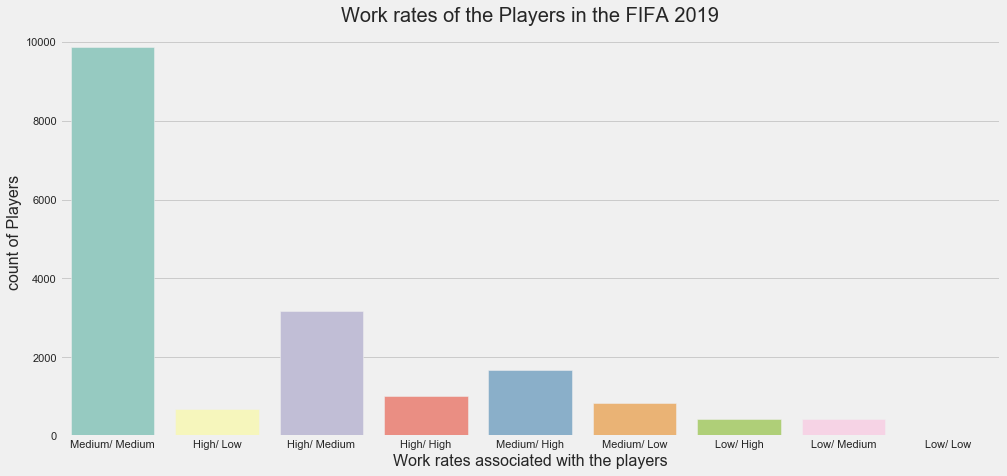

In [27]:
# Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 7))
sns.countplot(x = 'Work Rate', data = data, palette = 'Set3')
plt.title('Work rates of the Players in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

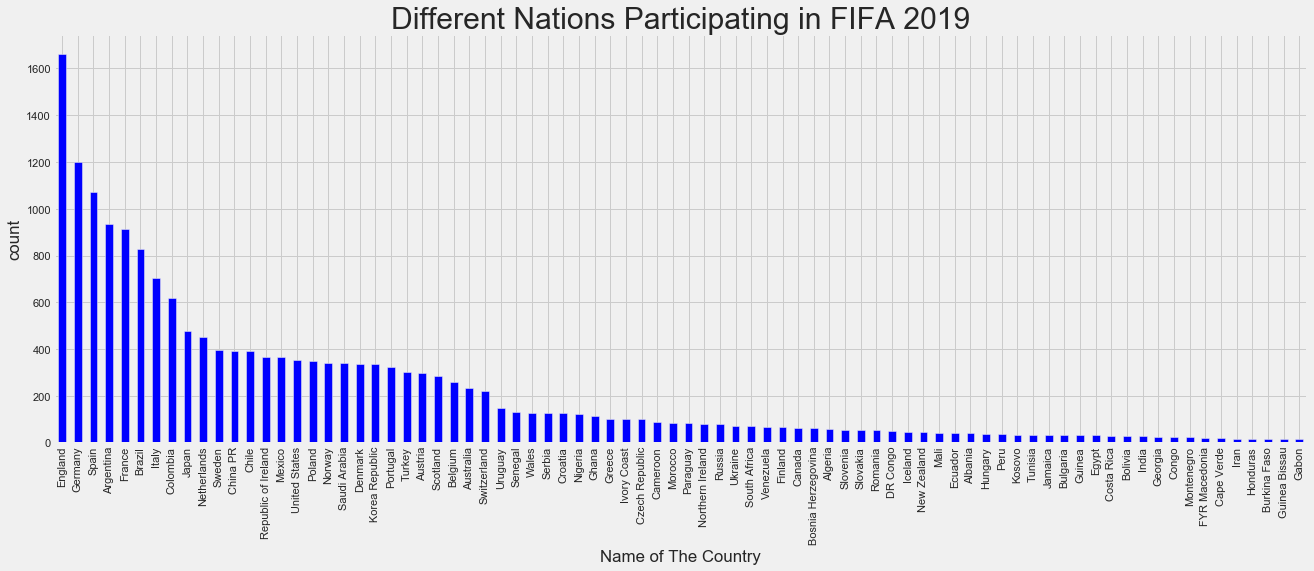

In [28]:
# Different nations participating in the FIFA 2019

data['Nationality'].value_counts().head(80).plot.bar(color = 'blue', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

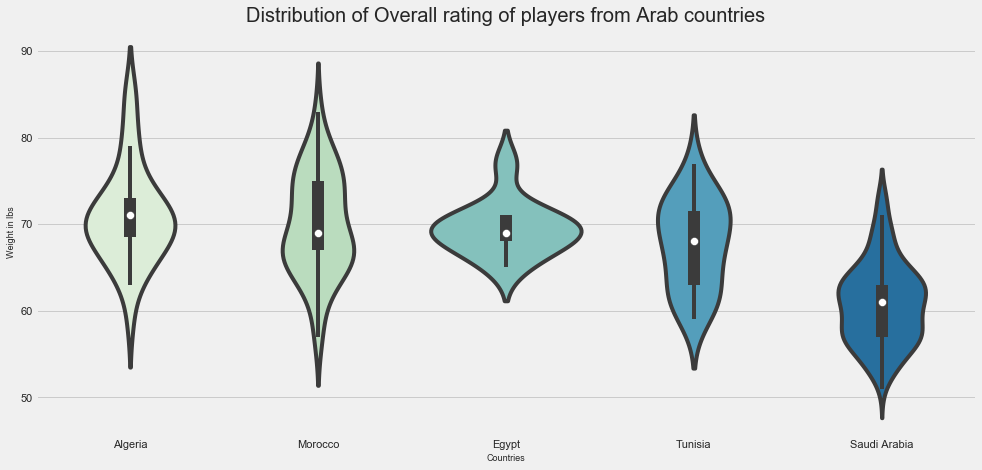

In [29]:
# Arab Nations’ Player and their overall score

some_countries = ('Egypt', 'Saudi Arabia', 'Algeria', 'Morocco', 'Tunisia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'GnBu')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Overall rating of players from Arab countries', fontsize = 20)
plt.show()

In [30]:
# popular clubs
some_clubs = ('Liverpool', 'Southampton', 'Juventus', 'Borussia Dortmund', 'FC Bayern München', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Manchester United', 'Chelsea', 'Real Madrid')

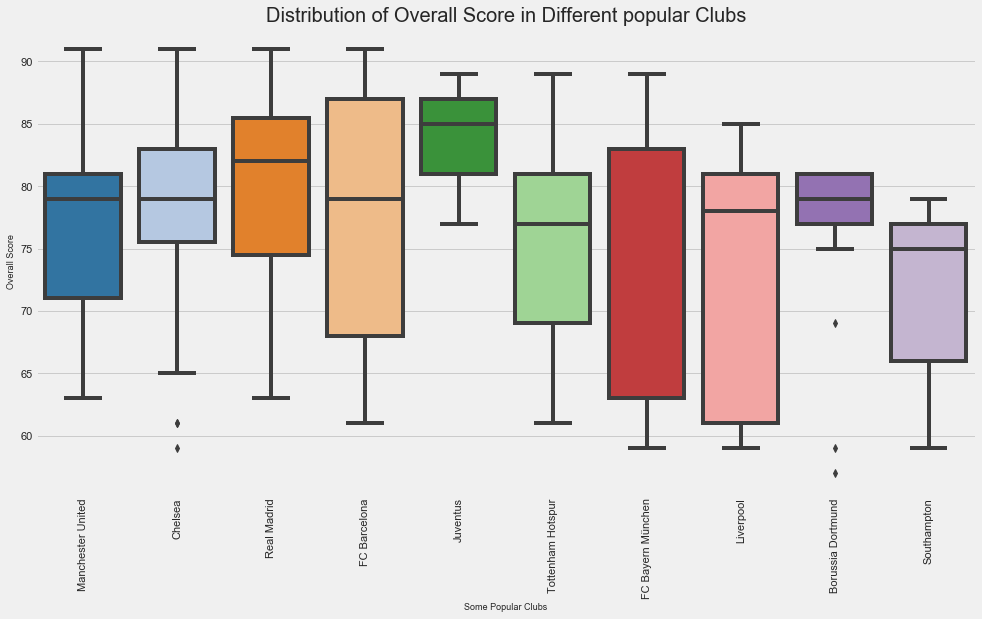

In [31]:
# Overall score of popular clubs
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'tab20')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

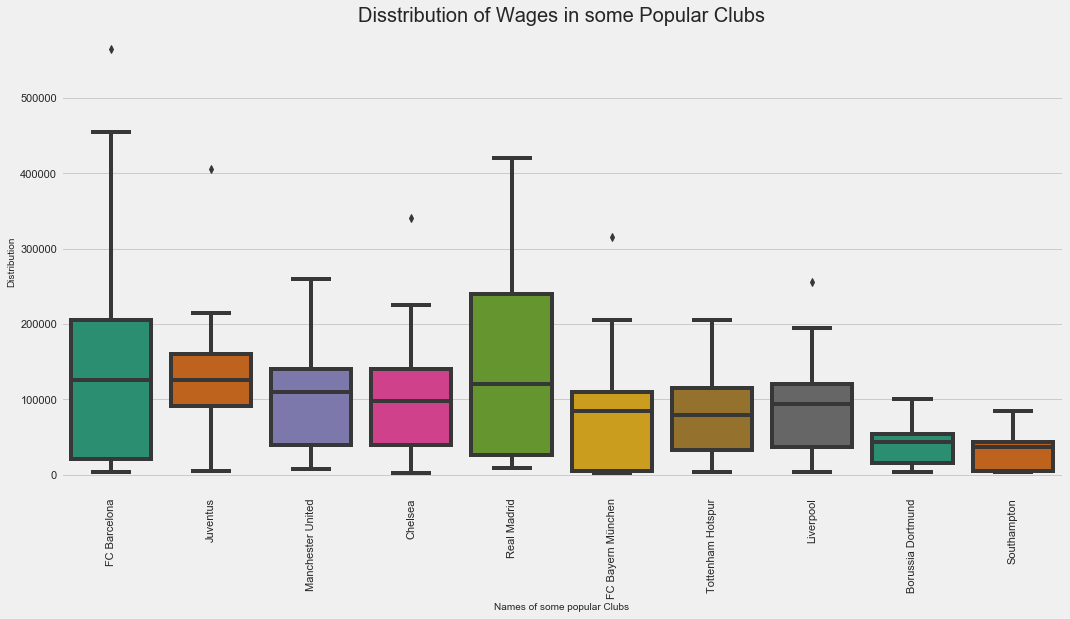

In [32]:
# wage distribution of popular clubs
data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Dark2')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

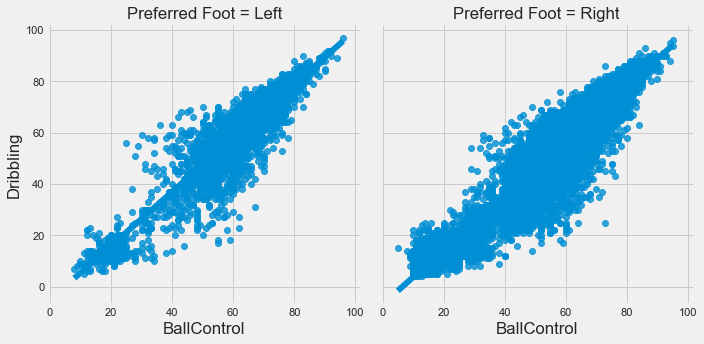

In [33]:
# ballcontrol vs dribbing
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()